# Generate forcing datasets for FIESTY from the CESM-DPLE experiments

In [14]:
import os
from glob import glob

import matplotlib.colors as colors

import numpy as np
import xarray as xr

## Spin up a dask cluster

In [2]:
from ncar_jobqueue import NCARCluster
from dask.distributed import Client
try: 
    cluster
    client
except:
    cluster = NCARCluster(
        job_extra=[
            '-C casper', 
            '-o /glade/scratch/mclong/dask-workers/dask-worker.o%J', 
            '-e /glade/scratch/mclong/dask-workers/dask-worker.e%J',
        ]
    )
    cluster.scale(12)
    client = Client(cluster) # Connect this local process to remote workers

cluster

/glade/work/mclong/miniconda3/envs/fish-offline/lib/python3.7/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


NCARCluster('tcp://10.12.205.14:33434', workers=0, threads=0, memory=0 B)

## Set up access to FOSI data files

In [3]:
%%time
droot = '/glade/p/cesm/community/CESM-DPLE/CESM-DPLE_POPCICEhindcast'
case = 'g.e11_LENS.GECOIAF.T62_g16.009'

def file_pop_h(varname):
    file_name = f'{droot}/{case}.pop.h.{varname}.024901-031612.nc'
    assert os.path.exists(file_name), f'missing {file_name}'
    return file_name

varnames = ['TEMP', 'zooC', 'zoo_loss', 'diatC', 'spC', 'POC_FLUX_IN']

dsets = {}
for v in varnames:
    print(f'loading {v}')
    dsets[v] = xr.open_dataset(
            file_pop_h(v), 
            decode_coords=False, 
            decode_times=False,
            chunks={'time': 12}, #{'nlat': 32, 'nlon': 32}, # 
        ).persist()

dsets[v]

loading TEMP
loading zooC
loading zoo_loss
loading diatC
loading spC
loading POC_FLUX_IN
CPU times: user 384 ms, sys: 55 ms, total: 439 ms
Wall time: 1.16 s


<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 816, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * time                  (time) float64 9.092e+04 9.094e+04 ... 1.157e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    REGION_MASK           (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    fwflux_factor         float64 ...
    latent_heat_vapor     float64 ...
    transport_regions     (transport_reg) |S256 dask.array<chunksize=(2,), meta=np.ndarray>
    ANGLE                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    sea_ice_salinity      float64 ...
    sound                 float64 ...
    stefan_boltzmann      float64 ...
    dz                    (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    salt_to_mmday         float64 ...
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    salinity_factor       float64 ...
    grav                  float64 ...
    KMT                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    days_in_norm_year     float64 ...
    hflux_factor          float64 ...
    ANGLET                (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    radius                float64 ...
    mass_to_Sv            float64 ...
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HUW                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HUS                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    heat_to_PW            float64 ...
    nsurface_t            float64 ...
    nsurface_u            float64 ...
    DYU                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HTE                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    HTN                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    dzw                   (z_w) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    cp_air                float64 ...
    ocn_ref_salinity      float64 ...
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    rho_sw                float64 ...
    KMU                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    rho_air               float64 ...
    sflux_factor          float64 ...
    moc_components        (moc_comp) |S256 dask.array<chunksize=(3,), meta=np.ndarray>
    HT                    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    momentum_factor       float64 ...
    T0_Kelvin             float64 ...
    DXU                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    latent_heat_fusion    float64 ...
    DXT                   (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    transport_components  (transport_comp) |S256 dask.array<chunksize=

## Compute forcing datasets

Inialize outout dataset

In [4]:
%%time
USER = os.environ['USER']
dout = f'/glade/scratch/{USER}/fish-offline'
os.makedirs(dout, exist_ok=True)

dso = dsets[varnames[0]][['TLONG', 'TLAT', 'KMT', 'TAREA']]
dso

CPU times: user 0 ns, sys: 305 µs, total: 305 µs
Wall time: 312 µs


<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320)
Dimensions without coordinates: nlat, nlon
Data variables:
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMT      (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Attributes:
    nsteps_total:    2263750
    tavg_sum:        2678400.0
    title:           g.e11_LENS.GECOIAF.T62_g16.009
    start_time:      This dataset was created on 2015-07-15 at 00:58:12.7
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    source:          CCSM POP2, the CCSM Ocean Component
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    calendar:        All years have exactly  365 days.
    tavg_sum_qflux:  2678400.0
    contents:        Diagnostic and Prognostic Variables
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $

## Compute upper 100 m means

In [5]:
%%time
def field_100m_mean(da):
    """compute mean over upper 100 m; assume constant dz"""
    depth_slice = slice(0, 100e2)
    with xr.set_options(keep_attrs=True):
        if 'z_t' in da.dims:
            return da.sel(z_t=slice(0, 100e2)).mean('z_t')
        elif 'z_t_150m' in da.dims:
            return da.sel(z_t_150m=slice(0, 100e2)).mean('z_t_150m')

for v in ['TEMP', 'zooC', 'zoo_loss', 'diatC', 'spC']:
    dso[f'{v}_100m'] = field_100m_mean(dsets[v][v]).compute()
dso.info()    

xarray.Dataset {
dimensions:
	nlat = 384 ;
	nlon = 320 ;
	time = 816 ;

variables:
	float64 TLONG(nlat, nlon) ;
		TLONG:units = degrees_east ;
		TLONG:long_name = array of t-grid longitudes ;
	float64 TLAT(nlat, nlon) ;
		TLAT:units = degrees_north ;
		TLAT:long_name = array of t-grid latitudes ;
	float64 KMT(nlat, nlon) ;
		KMT:long_name = k Index of Deepest Grid Cell on T Grid ;
		KMT:coordinates = TLONG TLAT ;
	float64 TAREA(nlat, nlon) ;
		TAREA:units = centimeter^2 ;
		TAREA:long_name = area of T cells ;
		TAREA:coordinates = TLONG TLAT ;
	float64 time(time) ;
		time:units = days since 0000-01-01 00:00:00 ;
		time:long_name = time ;
		time:calendar = noleap ;
		time:bounds = time_bound ;
	float32 TEMP_100m(time, nlat, nlon) ;
		TEMP_100m:coordinates = TLONG TLAT z_t time ;
		TEMP_100m:grid_loc = 3111 ;
		TEMP_100m:long_name = Potential Temperature ;
		TEMP_100m:cell_methods = time: mean ;
		TEMP_100m:units = degC ;
	float32 zooC_100m(time, nlat, nlon) ;
		zooC_100m:coordinates = T

Check output

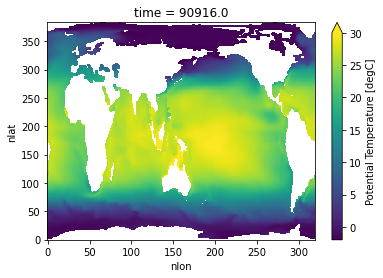

In [6]:
dso.TEMP_100m.isel(time=0).plot(vmin=-2, vmax=30.)

## Compute properties at model bottom

In [7]:
KMT = dsets[varnames[0]].KMT.compute()
KMT

<xarray.DataArray 'KMT' (nlat: 384, nlon: 320)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [38., 38., 38., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:    k Index of Deepest Grid Cell on T Grid
    coordinates:  TLONG TLAT

In [8]:
%%time
def field_at_bottom(da):
    """return a field indexed at the model's bottom layer"""
    print('here')
    tmp_bot = xr.DataArray(np.ones(da[:, 0, :, :].shape) * np.nan, 
                           dims=tuple(da.dims[i] for i in [0, 2, 3]),
                           coords={c: da.coords[c] for c in ['time']},
                          )

    assert KMT.shape == da.shape[-2:]
    
    for j in range(len(da.nlat)):
        for i in range(len(da.nlon)):
            if KMT[j, i] > 0:
                k = int(KMT[j, i] - 1)
                tmp_bot.values[:, j, i] = da[:, k, j, i]
    return tmp_bot

for v in ['TEMP', 'POC_FLUX_IN',]:
    template = dsets[v][v][:, 0, :, :].drop('z_t') 
    dso[f'{v}_bottom'] = xr.map_blocks(
        field_at_bottom, dsets[v][v], 
        template=template
    ).compute()

dso.info()    

xarray.Dataset {
dimensions:
	nlat = 384 ;
	nlon = 320 ;
	time = 816 ;

variables:
	float64 TLONG(nlat, nlon) ;
		TLONG:units = degrees_east ;
		TLONG:long_name = array of t-grid longitudes ;
	float64 TLAT(nlat, nlon) ;
		TLAT:units = degrees_north ;
		TLAT:long_name = array of t-grid latitudes ;
	float64 KMT(nlat, nlon) ;
		KMT:long_name = k Index of Deepest Grid Cell on T Grid ;
		KMT:coordinates = TLONG TLAT ;
	float64 TAREA(nlat, nlon) ;
		TAREA:units = centimeter^2 ;
		TAREA:long_name = area of T cells ;
		TAREA:coordinates = TLONG TLAT ;
	float64 time(time) ;
		time:units = days since 0000-01-01 00:00:00 ;
		time:long_name = time ;
		time:calendar = noleap ;
		time:bounds = time_bound ;
	float32 TEMP_100m(time, nlat, nlon) ;
		TEMP_100m:coordinates = TLONG TLAT z_t time ;
		TEMP_100m:grid_loc = 3111 ;
		TEMP_100m:long_name = Potential Temperature ;
		TEMP_100m:cell_methods = time: mean ;
		TEMP_100m:units = degC ;
	float32 zooC_100m(time, nlat, nlon) ;
		zooC_100m:coordinates = T

Check output

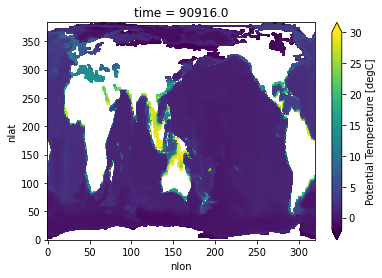

In [9]:
dso.TEMP_bottom.isel(time=0).plot(vmin=-2, vmax=30.)

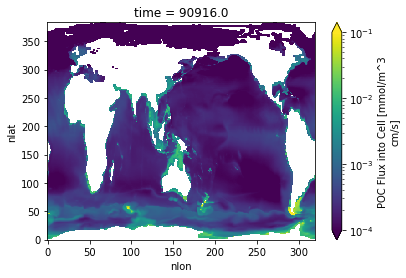

In [18]:
dso.POC_FLUX_IN_bottom.isel(time=0).plot(norm=colors.LogNorm(vmin=1e-4, vmax=0.1))

## Write output file

In [10]:
%%time
dso.to_netcdf(f'{dout}/{case}.FIESTY-forcing.nc', mode='w')

CPU times: user 15 s, sys: 1.3 s, total: 16.3 s
Wall time: 19.6 s
